In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('athlete_events.csv')
df2 = pd.read_csv('noc_regions.csv')

In [3]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df1.shape

(271116, 15)

In [5]:
df2.shape

(230, 3)

In [6]:
df = df1.merge(df2, on = 'NOC', how = 'left')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [9]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [11]:
df.duplicated().sum()

1385

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

In [14]:
df['Medal'].value_counts()

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

In [15]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis = 1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0


In [21]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2638.0,1641.0,1358.0
1,URS,1082.0,732.0,689.0
2,GER,745.0,674.0,746.0
3,GBR,677.0,739.0,651.0
4,ITA,575.0,531.0,531.0
...,...,...,...,...
225,LAO,0.0,0.0,0.0
226,AHO,0.0,1.0,0.0
227,LBR,0.0,0.0,0.0
228,LCA,0.0,0.0,0.0


In [22]:
df_New = df.drop_duplicates(subset = ['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])

In [23]:
df_New = df_New.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()

In [24]:
df_New[df_New['NOC']== 'IND']

,NOC,Gold,Silver,Bronze
51,IND,10.0,7.0,12.0


In [25]:
df_New['Total'] = df_New['Gold'] + df_New['Silver'] + df_New['Bronze']

In [26]:
df_New.head()

,NOC,Gold,Silver,Bronze,Total
0,USA,1131.0,901.0,792.0,2824.0
1,URS,471.0,373.0,353.0,1197.0
2,GER,321.0,345.0,341.0,1007.0
3,GBR,289.0,321.0,312.0,922.0
4,FRA,265.0,287.0,334.0,886.0


In [27]:
df['region'].value_counts().head()

USA        18604
Germany    15787
France     12551
UK         12115
Russia     11692
Name: region, dtype: int64

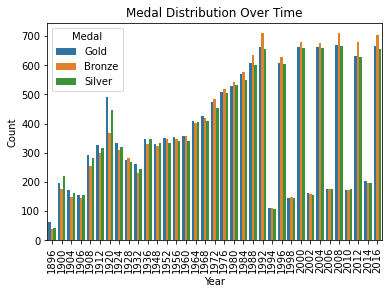

In [28]:
# Medal distribution over time
sns.countplot(data=df, x='Year', hue='Medal')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Medal Distribution Over Time')
plt.xticks(rotation=90)
plt.show()

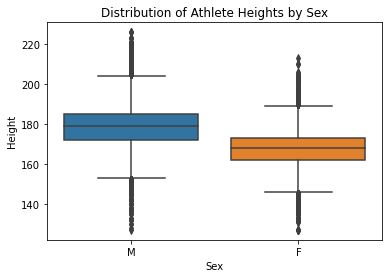

In [29]:
# Distribution of athlete heights by sex
sns.boxplot(data=df, x='Sex', y='Height')
plt.xlabel('Sex')
plt.ylabel('Height')
plt.title('Distribution of Athlete Heights by Sex')
plt.show()

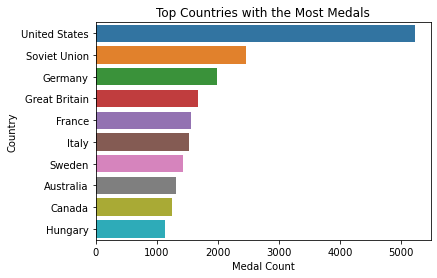

In [30]:
# Top countries with the most medals
top_countries = df[df['Medal'].notnull()]['Team'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.xlabel('Medal Count')
plt.ylabel('Country')
plt.title('Top Countries with the Most Medals')
plt.show()

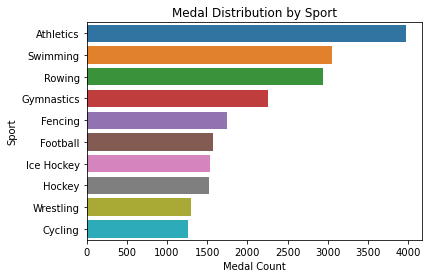

In [31]:
# Medal distribution by sport
sport_medals = df[df['Medal'].notnull()]['Sport'].value_counts().head(10)
sns.barplot(x=sport_medals.values, y=sport_medals.index)
plt.xlabel('Medal Count')
plt.ylabel('Sport')
plt.title('Medal Distribution by Sport')
plt.show()

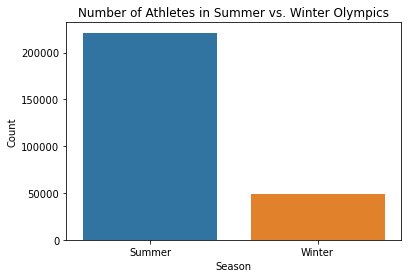

In [32]:
# Number of athletes in Summer vs. Winter Olympics
sns.countplot(data=df, x='Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Number of Athletes in Summer vs. Winter Olympics')
plt.show()


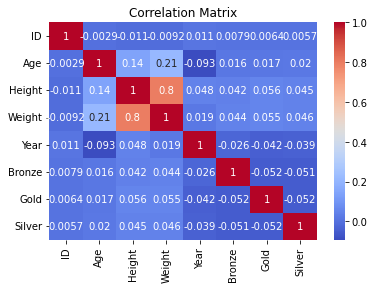

In [26]:
# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

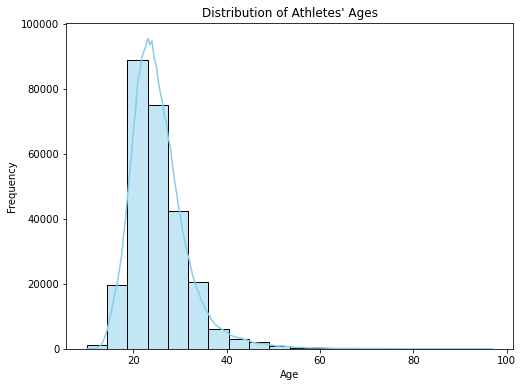

In [27]:
# Histogram of athletes' ages
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Athletes\' Ages')
plt.show()

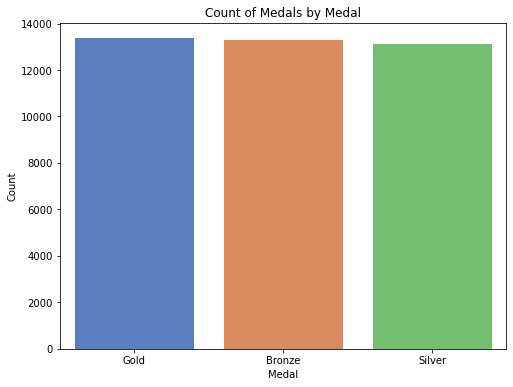

In [29]:
# Bar plot for the count of medals by medal type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Medal', palette='muted')
plt.xlabel('Medal')
plt.ylabel('Count')
plt.title('Count of Medals by Medal')
plt.show()

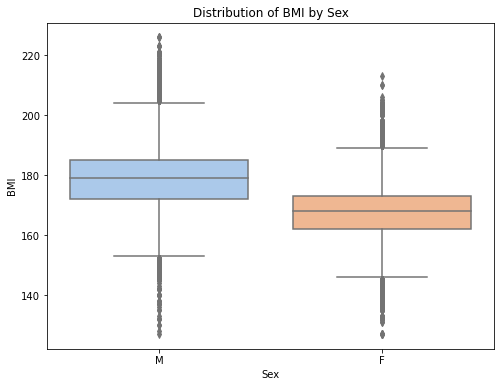

In [32]:
# Box plot for athletes' BMI by sex
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sex', y='Height', palette='pastel')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Sex')
plt.show()

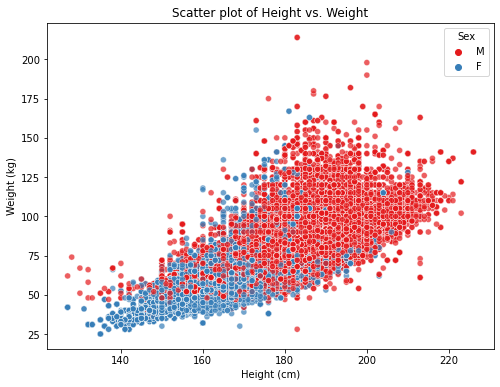

In [33]:
# Scatter plot of athletes' height and weight colored by sex
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Sex', palette='Set1', alpha=0.7)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter plot of Height vs. Weight')
plt.show()

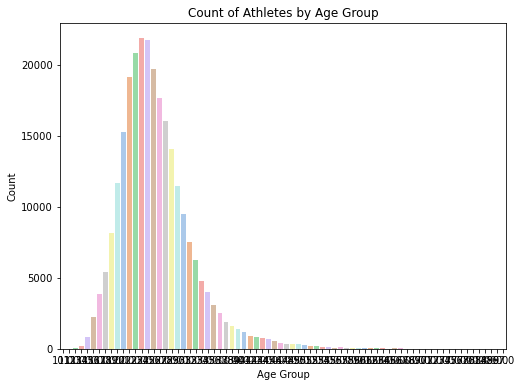

In [35]:
# Bar plot for the count of athletes by age group
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age', palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Athletes by Age Group')
plt.show()